In [50]:
import matplotlib.pyplot as plt
import os
import csv
import numpy as np
from functions import * #importo tutte le funzioni da functions.py
path_db_raman = "/home/luca/Uni/VI/Data science/Progetto/prog_DS/Raman-20250709T202209Z-1-001/Database Raman"

Guardando dentro ai file di database Raman, scopriamo che sono salvati come txt, con spazi all'inizio e "a capi" dopo ogni coppia di punti x,y. Questa viene segnata con un \n quando si importa la stringa. Perciò bisogna aggeggiare i dati per plottarli, così:

In [32]:
name ="/home/luca/Uni/VI/Data science/Progetto/prog_DS/Raman-20250709T202209Z-1-001/Database Raman/Albite.txt"
open(name).read()

'   1.0000000e+02   0.0000000e+00\n   1.3037720e+02   0.0000000e+00\n   1.3085930e+02   2.9943790e+01\n   1.3134140e+02   4.0095520e+01\n   1.3182350e+02   3.2205990e+01\n   1.3230560e+02   1.0157960e+01\n   1.3278770e+02   7.4509280e+00\n   1.3326990e+02   1.5932010e+01\n   1.3375200e+02   1.6734500e+01\n   1.3423410e+02   4.7994380e+00\n   1.3471620e+02   2.3696290e+01\n   1.3519830e+02   6.8358890e+01\n   1.3568040e+02   1.1337610e+02\n   1.3616260e+02   1.5505810e+02\n   1.3664470e+02   1.9905530e+02\n   1.3712680e+02   2.5757540e+02\n   1.3760890e+02   3.3209120e+02\n   1.3809100e+02   4.1220920e+02\n   1.3857310e+02   4.8680090e+02\n   1.3905530e+02   5.5148770e+02\n   1.3953740e+02   6.3634300e+02\n   1.4001950e+02   7.4732230e+02\n   1.4050160e+02   8.7864310e+02\n   1.4098370e+02   1.0005360e+03\n   1.4146580e+02   1.1037830e+03\n   1.4194800e+02   1.2139040e+03\n   1.4243010e+02   1.3493480e+03\n   1.4291220e+02   1.5232430e+03\n   1.4339430e+02   1.6943390e+03\n   1.4387640e

**Spettri di riferimento:**

Output per farsi un'idea della forma degli spettri

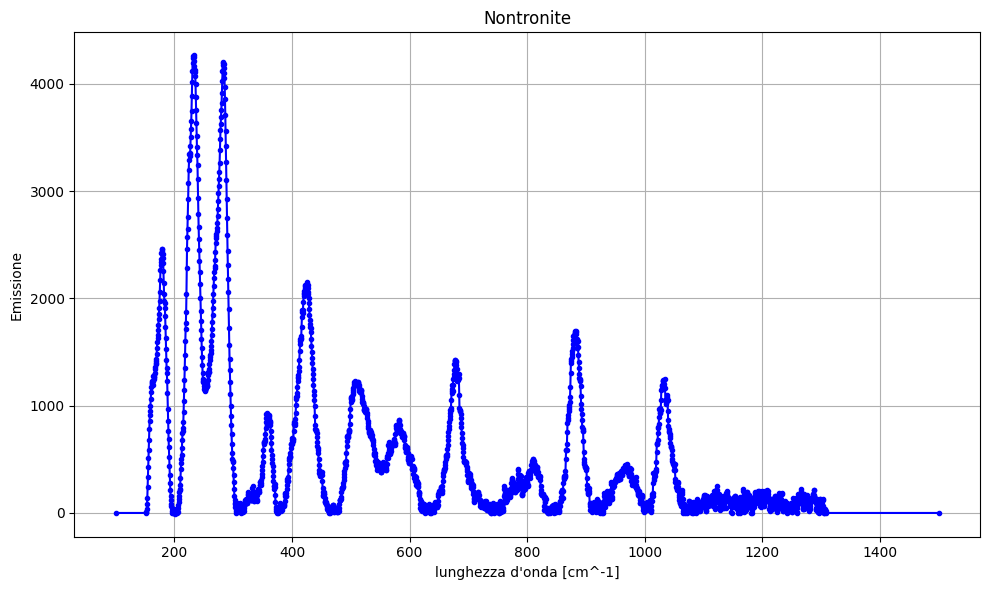

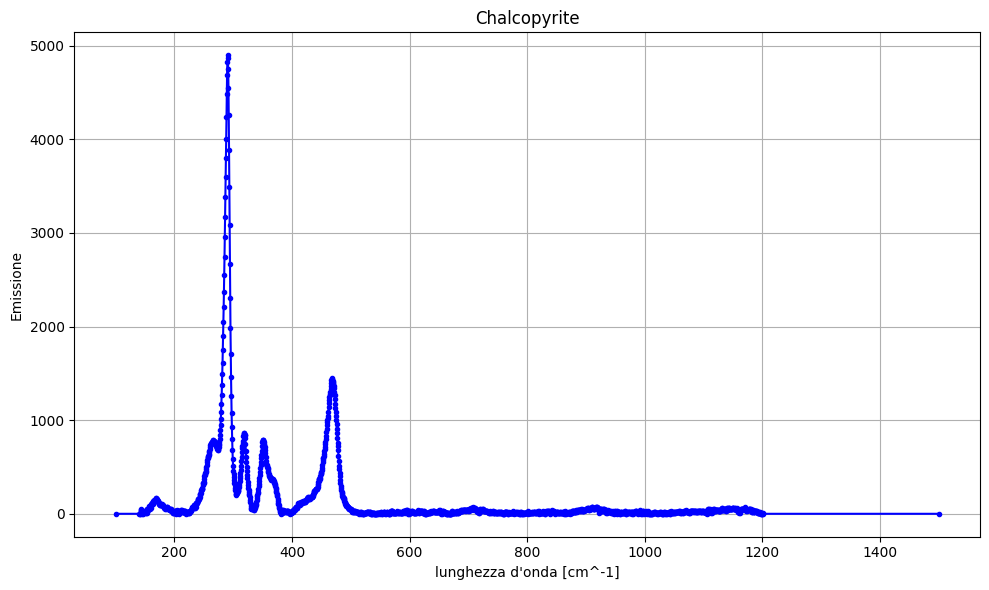

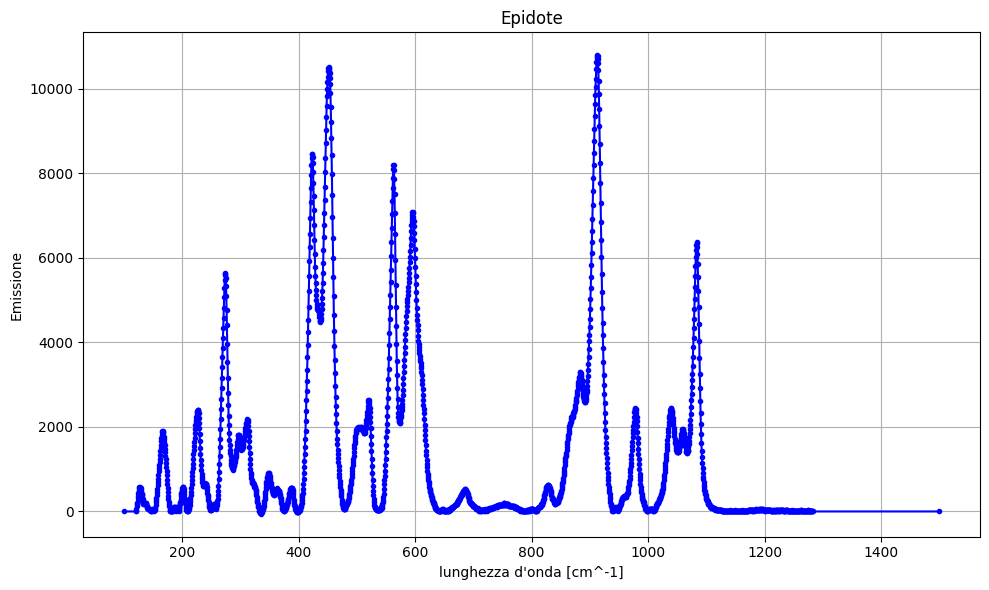

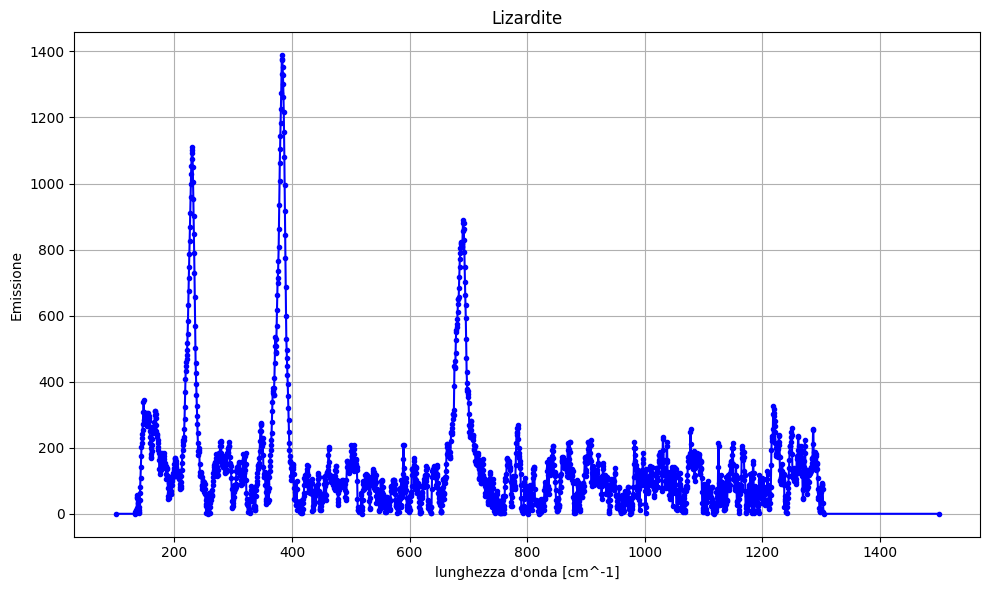

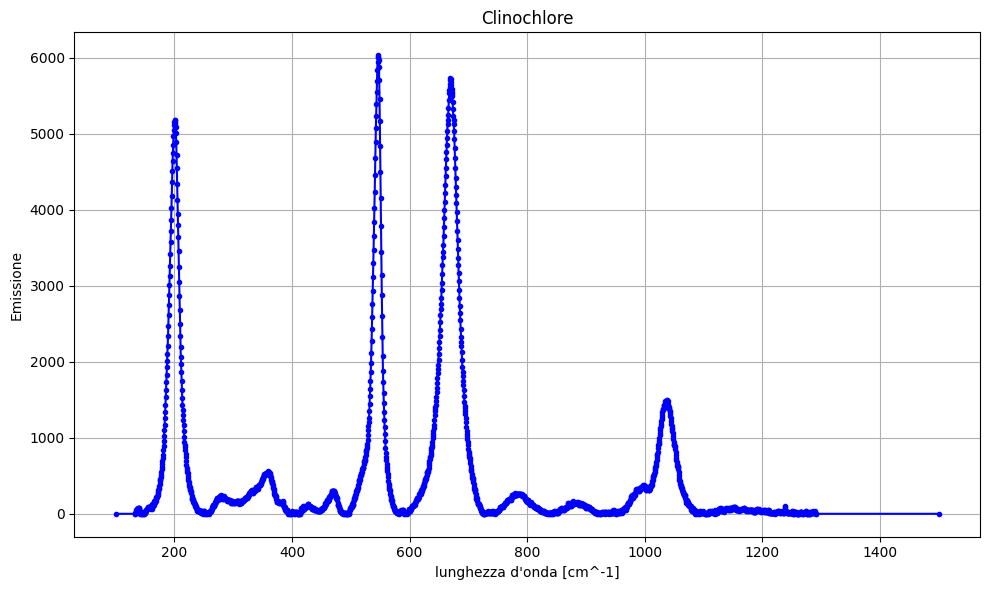

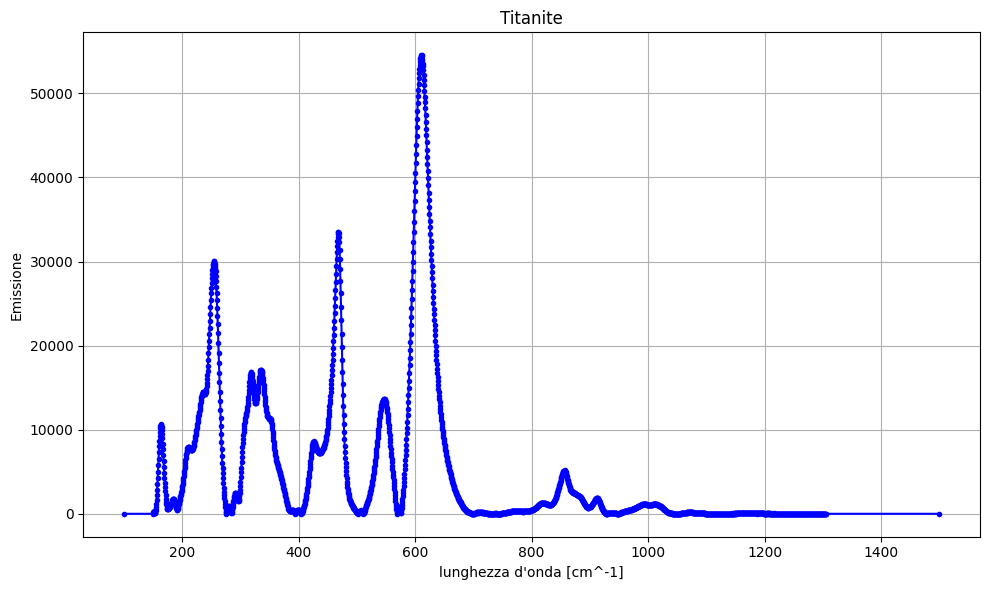

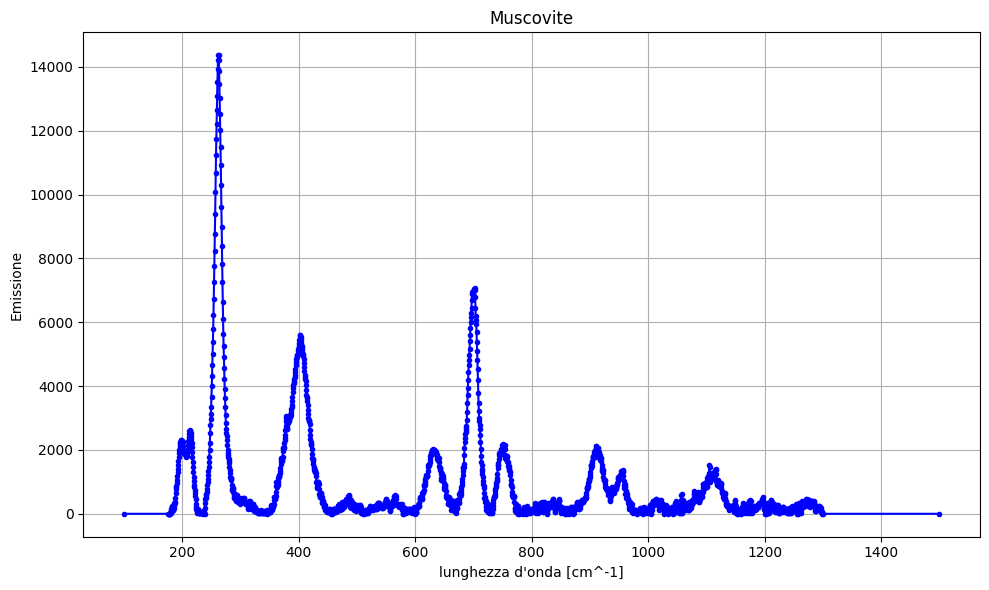

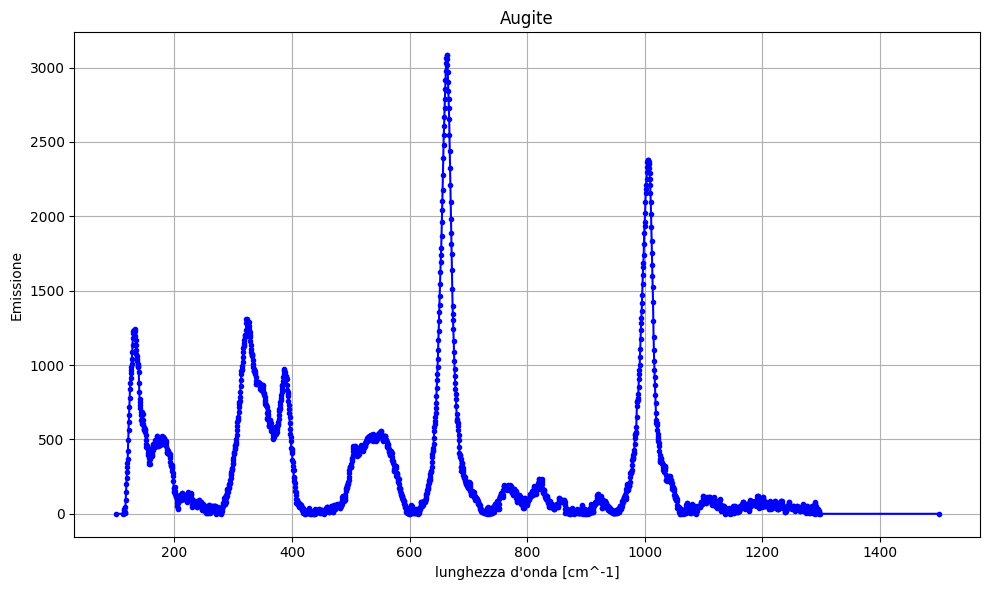

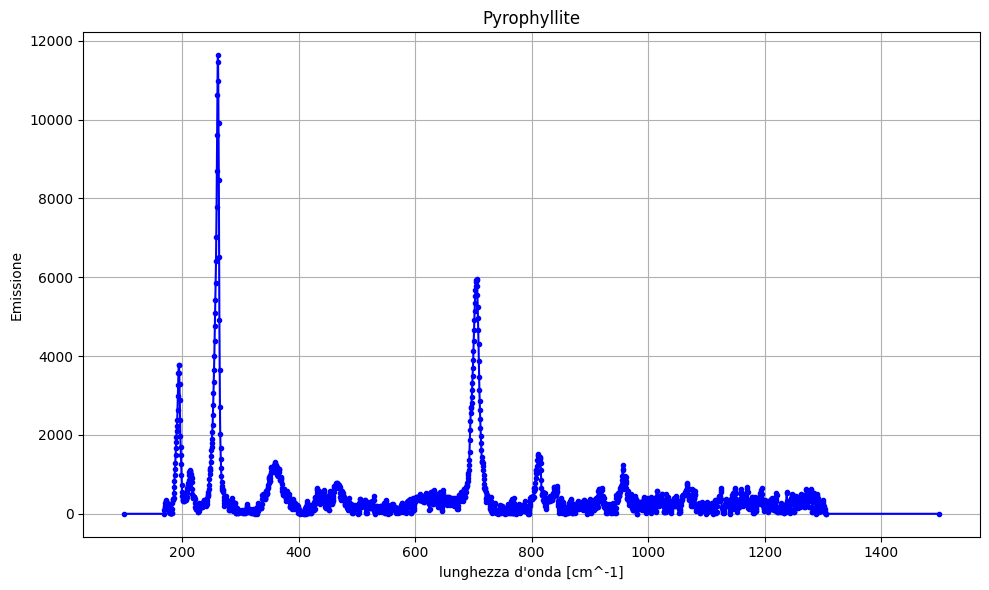

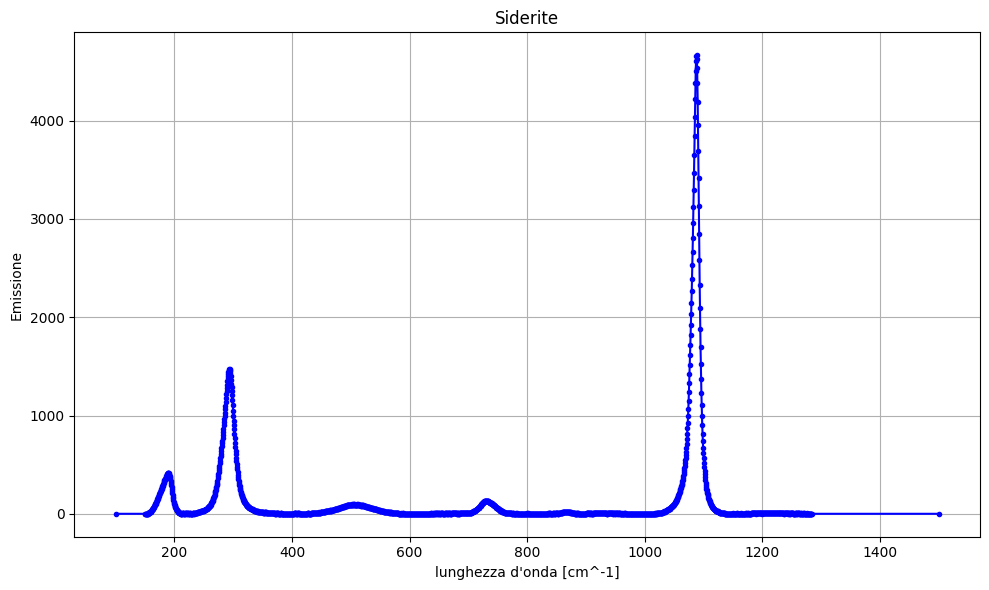

In [40]:
names = os.listdir(path_db_raman)   #sto salvando i nomi dei file nella cartella Database Raman
names = [f for f in names if os.path.isfile(os.path.join(path_db_raman, f))] #creo una lista, voglio solo file non cartelle

for i in range(10): #plotto i primi 10 file
    spettro = names[i]
    testo = open(os.path.join(path_db_raman, spettro)).read()   #leggo il file relativo al minerale
    lines = testo.replace('\\n', '\n').strip().split('\n')      #tolgo /n e divido in righe diverse quando li incontro
    x_val = []
    y_val = []
    for line in lines:  #ciclo sulle righe
        parts = line.strip().split()    #separo gli spazi, quindi le colonne
        if len(parts) == 2:
            x = float(parts[0])
            y = float(parts[1])
            x_val.append(x)
            y_val.append(y)
    #plotto il minerale scelto
    plt.figure(figsize=(10, 6))
    plt.plot(x_val, y_val, marker='.', linestyle='-', color='blue')
    plt.xlabel("lunghezza d'onda [cm^-1]")
    plt.ylabel('Emissione')
    plt.title(spettro.removesuffix('.txt')) #nome del minerale
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Ho fatto nel file functions una classe dei minerali di riferimento, così poi da salvare su csv gli spettri, e averli più comodi

In [ ]:
names = os.listdir(path_db_raman)   #sto salvando i nomi dei file nella cartella Database Raman
names = [f for f in names if os.path.isfile(os.path.join(path_db_raman, f))] #creo una lista, voglio solo file non cartelle
minerali = []  #creo una lista vuota per i minerali
for spettro in names: #plotto i primi 10 file
    testo = open(os.path.join(path_db_raman, spettro)).read()   #leggo il file relativo al minerale
    lines = testo.replace('\\n', '\n').strip().split('\n')      #tolgo /n e divido in righe diverse quando li incontro
    x_val = []
    y_val = []
    for line in lines:  #ciclo sulle righe
        parts = line.strip().split()    #separo gli spazi, quindi le colonne
        if len(parts) == 2:
            x = float(parts[0])
            y = float(parts[1])
            x_val.append(x)
            y_val.append(y)
    minerali.append(Minerale(spettro.removesuffix('.txt'), x_val, y_val))  #creo un oggetto Minerale e lo aggiungo alla lista

    

Mi salvo ora su csv i dati relativi agli spettri dei minerali puri, ho quindi:


"nome minerale", valore x, valore y fino ad esaurimento coppie x,y

In [ ]:
with open("minerali.csv", "w", newline="") as file:
    writer = csv.writer(file)
    #writer.writerow(["nome", "x", "y"])  # intestazione

    for minerale in minerali:
        for xi, yi in zip(minerale.x, minerale.y):
            #writer.writerow([minerale.nome, xi, yi])
#Non so se è il modo più comodo per salvare gli spettri, ma ricordando la classe, va bene
#Ho commentato la parte di scrittura, così da non andare a modificare più il file


Faccio ora una classe degli spettri acquisiti, ossia un formato 11x11 della classe dei minerali.

In [42]:
class Minerali_da_riconoscere:
    def __init__(self, nome, x_vals, y_vals,num_riga, num_colonna):
        self.nome = nome
        self.riga = num_riga
        self.colonna = num_colonna
        self.x = x_vals
        self.y = y_vals

Ora salvo i dati in csv

In [ ]:
directory= "/home/luca/Uni/VI/Data science/Progetto/prog_DS/Raman-20250709T202209Z-1-001"
names = os.listdir(directory)   #sto salvando i nomi dei file nella cartella Database Raman
names = [f for f in names if os.path.isfile(os.path.join(directory, f))] #creo una lista, voglio solo file non cartelle
k = 0
data = []
for i in names:
    testo = open(os.path.join(directory, i)).read()   #leggo il file
    lines = testo.replace('\\n', '\n').strip().split('\n')      #tolgo /n e divido in righe diverse quando li incontro
    x_val = []
    y_val = []
    for line in lines:  #ciclo sulle righe
        parts = line.strip().split()    #separo gli spazi, quindi le colonne
        x = float(parts[0])
        y = np.array(parts[1:]).T #sono ancora stringhe
        x_val.append(x)
        y_val.append(y.astype(np.float64))  #ora ho una lista di array numpy, ciascuno rappresenta una riga 
    y_val = np.vstack(y_val)    #unisco le righe

    for j in range(len(y_val[0,:])):
        riga = j//11
        colonna = j-riga*11
        data.append(Minerali_da_riconoscere(str(k),x_val, y_val[:,j], riga, colonna))
    
    k+=1
        
        

for i in range(4):
    nome = names[i].removesuffix('.txt') +".csv"
    with open(nome, "w", newline="") as file:
        writer = csv.writer(file)
        #writer.writerow(["riga","colonna", "x", "y"])  # intestazione
        for minerale in data:
            for xi, yi in zip(minerale.x, minerale.y):
                #writer.writerow([minerale.riga,minerale.colonna, xi, yi])

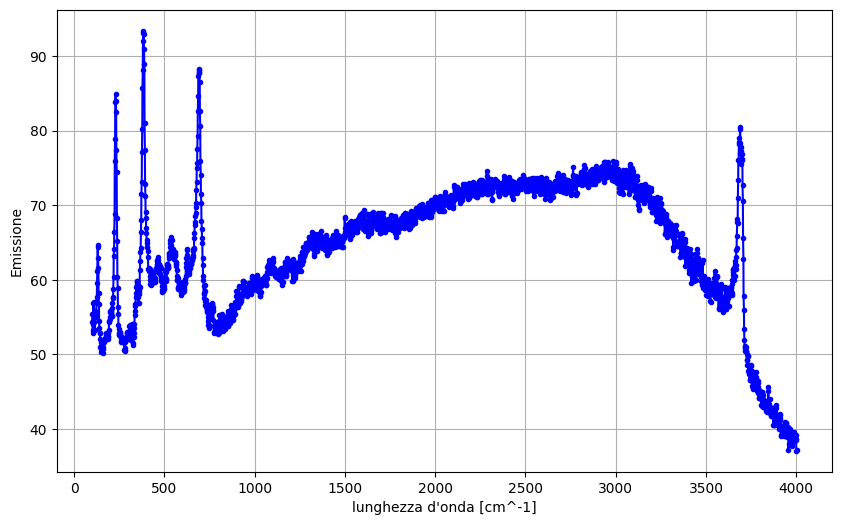

In [162]:
plt.figure(figsize=(10, 6))
plt.plot(x_val,y_val[:,0], marker='.', linestyle=None, color='blue')
plt.xlabel("lunghezza d'onda [cm^-1]")
plt.ylabel('Emissione')
plt.grid(True)
plt.show()